##Install pandas

In [ ]:
!pip install pandas_ta prophet

     |████████████████████████████████| 115 kB 5.4 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=478c1c99d04ccef3489c4957a024c9be87f9c57b802eb0f36d2a9c8c2bd9e332
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638892 sha256=e419a8c0fad224226c496a056a1a104d56860fe4908dcb9bc6f17598ac4d80e1
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built pandas-ta prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not curr

In [ ]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)

##Import Ethereum daily historical dataset

In [ ]:
csv_data="https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1438905600&period2=1638748800&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(csv_data, parse_dates=['Date'])
df = df.sort_values('Date')
cdf = df.copy(deep=True).drop(columns=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'])[:-1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


##Add RSI, SMA and MACD columns to the data frame

In [ ]:
df.ta.rsi(close='Close', length=14, append=True)
df.ta.sma(close='Close', length=14, append=True)
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
# macd -> fast signal
# macds -> slow signal
# macdh -> histogram
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,SMA_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
1484,2021-12-02,4586.333008,4628.919922,4441.507813,4511.302246,4511.302246,21502671027,54.699428,4322.790562,41.816017,25.493406,16.322611
1485,2021-12-03,4514.355957,4647.289063,4100.145508,4220.706055,4220.706055,25879591528,46.799576,4317.247663,24.781433,6.767058,18.014375
1486,2021-12-04,4227.762207,4242.725586,3525.494141,4119.587402,4119.587402,38478999182,44.396798,4296.508824,3.086394,-11.942385,15.028779
1487,2021-12-05,4119.628906,4246.923340,4040.217529,4198.322754,4198.322754,25533062707,46.691830,4291.408098,-7.665433,-18.155370,10.489937
1488,2021-12-06,4199.000000,4375.520508,3930.806641,4358.737305,4358.737305,28229518513,51.118641,4310.713780,-3.205272,-10.956167,7.750895


##Plot SMA

Text(0.5, 1.0, 'Simple Moving Average')

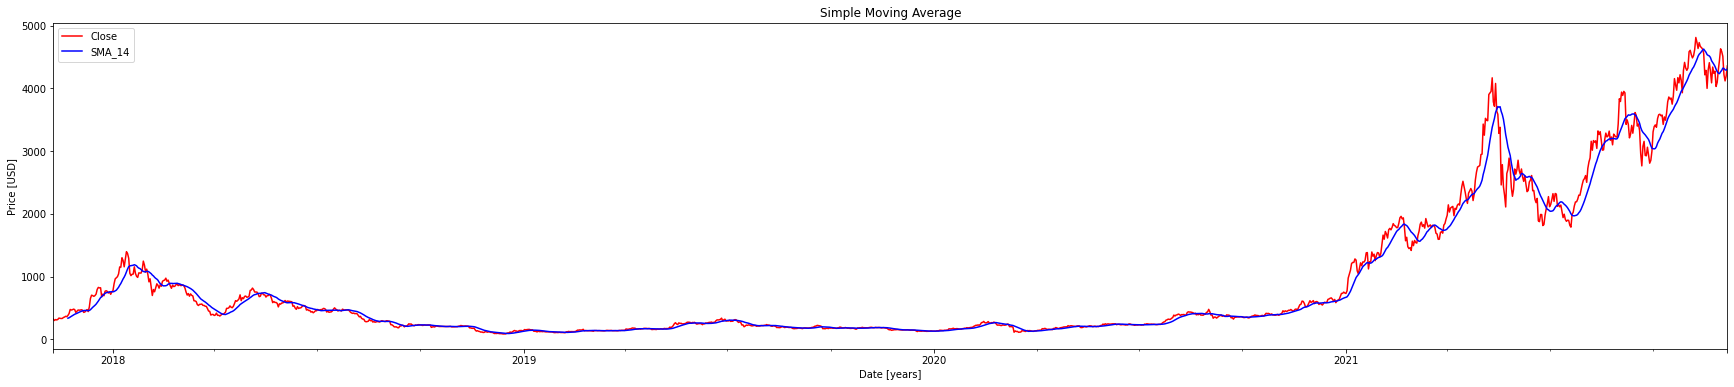

In [ ]:
subp = plt.figure(figsize=(30, 6)).add_subplot(111)
df.plot(x='Date', y='Close', color='r', ax=subp)
df.plot(x="Date", y='SMA_14', color='b', ax=subp)
# df.plot(x='Date', y='Open', color='g', ax=subp);
subp.set_xlabel("Date [years]")
subp.set_ylabel("Price [USD]")
subp.set_title("Simple Moving Average")

##Plot MACD

Text(0.5, 1.0, 'Moving Average Convergence Divergence')

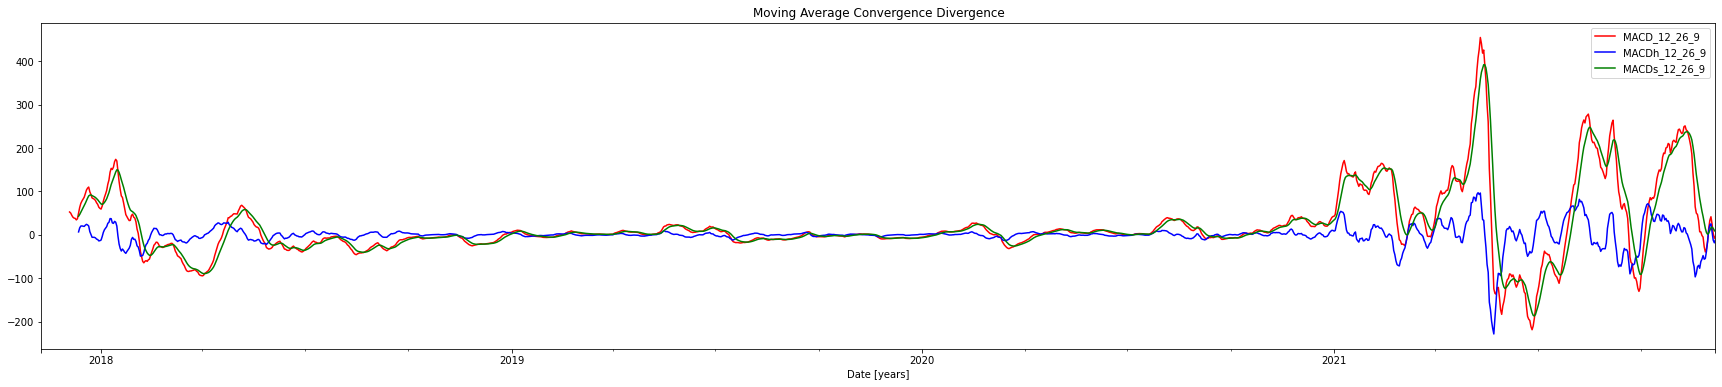

In [ ]:
subp = plt.figure(figsize=(30, 6)).add_subplot(111)
df.plot(x='Date', y='MACD_12_26_9', color='r', ax=subp)
df.plot(x="Date", y='MACDh_12_26_9', color='b', ax=subp)
df.plot(x="Date", y='MACDs_12_26_9', color='g', ax=subp)
# df.plot(x='Date', y='Open', color='r', ax=subp);
subp.set_xlabel("Date [years]")
subp.set_title("Moving Average Convergence Divergence")

##Plot RSI

Text(0.5, 1.0, 'Relative Strength Index')

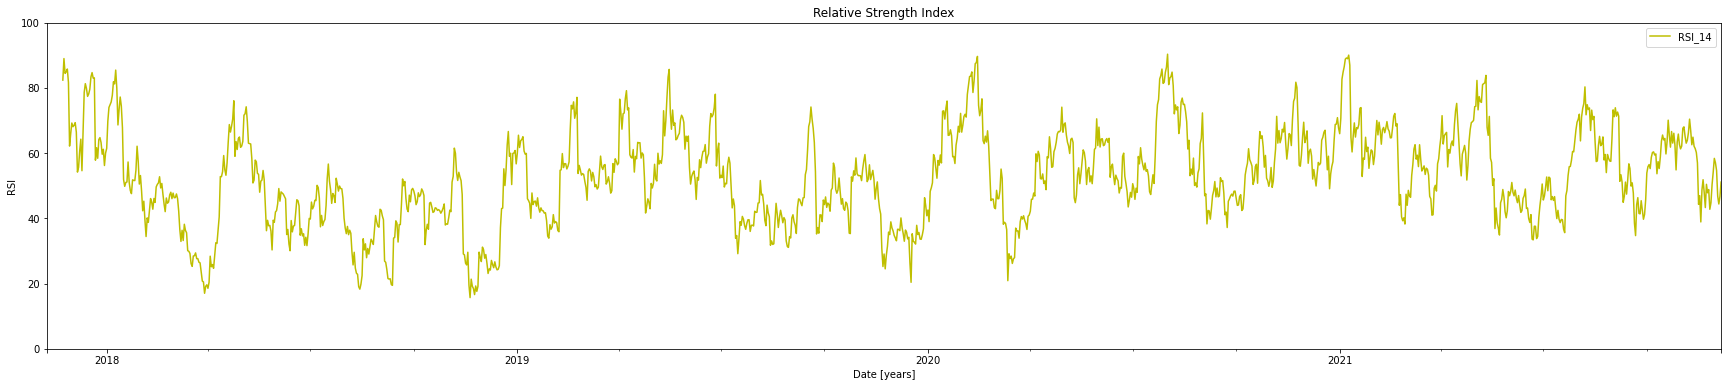

In [ ]:
ax = df.plot(x='Date', y='RSI_14', color='y', figsize=(30, 6));
ax.set_xlabel("Date [years]")
ax.set_ylabel("RSI")
ax.set_ylim(0, 100)
ax.set_title("Relative Strength Index")

##Plot MACD fast signal and slow signal

In [ ]:
import plotly
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Construct a 2 x 1 Plotly figure
fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=df['Date'],
        y=df['Open'],
        line=dict(color='#ff9900', width=1),
        name='Open',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df['Date'],
        y=df['MACD_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='MACD Fast Signal',
        # showlegend=False,
        legendgroup='2',
    ), row=2, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=df['Date'],
        y=df['MACDs_12_26_9'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='MACD Slow Signal'
    ), row=2, col=1
)
# Colorize the histogram values
colors = np.where(df['MACDh_12_26_9'] < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df['Date'],
        y=df['MACDh_12_26_9'],
        name='Histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.show()

##Remove missing values from the data frame

In [ ]:
pdf = df.filter(items=['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']).dropna()
np.isnan(pdf).any()

Close           False
RSI_14          False
SMA_14          False
MACD_12_26_9    False
dtype: bool

##Plot data distributions

In [ ]:
import seaborn as sns

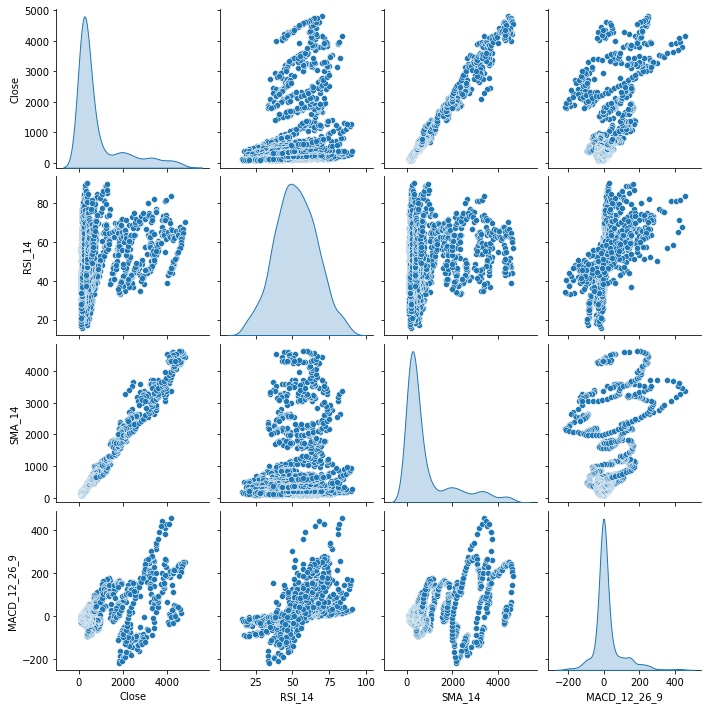

In [ ]:
sns.pairplot(pdf[['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']], diag_kind='kde')


##Statistical summary of the data 

In [ ]:
pdf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Close,1464.0,880.154160,1125.927192,84.308296,186.879577,350.060867,976.861267,4812.087402
RSI_14,1464.0,52.311451,14.186612,15.692594,42.457153,51.863444,62.325052,90.324771
SMA_14,1464.0,862.976586,1097.022903,91.546211,186.466166,354.669984,899.827291,4626.703509
MACD_12_26_9,1464.0,19.025539,76.548848,-218.253147,-9.864153,1.997022,24.853281,454.410640


##Scale the data

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
spdf = min_max_scaler.fit_transform(pdf)
spdf = pd.DataFrame(spdf, columns=pdf.columns) # indexes are not preserved use index=pdf.index if index preserving is needed
spdf

,Close,RSI_14,SMA_14,MACD_12_26_9
0,0.081623,0.718700,0.078372,0.402852
1,0.080159,0.679775,0.079993,0.399116
2,0.072821,0.515629,0.080748,0.391225
3,0.074052,0.535427,0.081129,0.384971
4,0.078625,0.603328,0.080832,0.381947
...,...,...,...,...
1459,0.936379,0.522654,0.932987,0.386626
1460,0.874913,0.416804,0.931765,0.361302
1461,0.853525,0.384609,0.927192,0.329049
1462,0.870179,0.415360,0.926068,0.313065


## Plot the scaled data

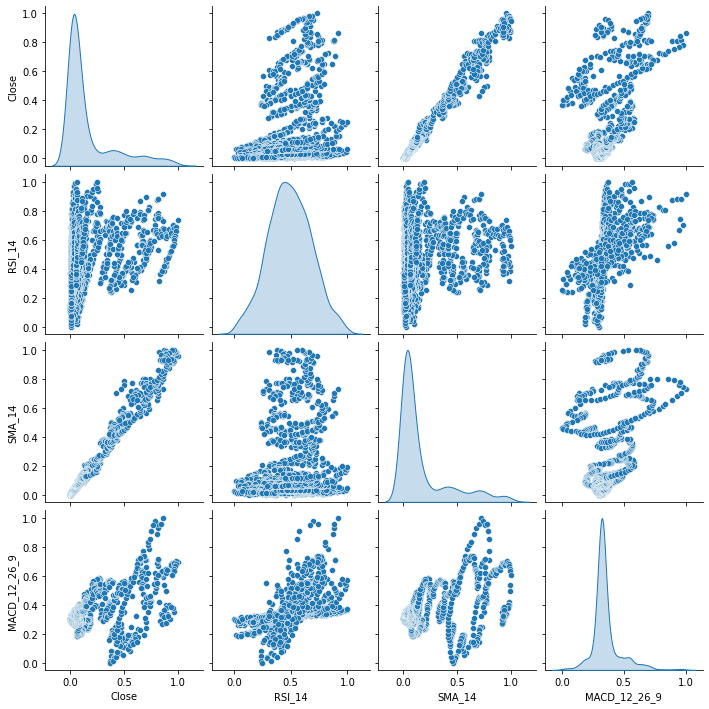

In [ ]:
sns.pairplot(spdf[['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']], diag_kind='kde')

##Prepare train data and labels for the model fitting

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
OFFSET = 1

In [ ]:
# remove first label and last data to create prediciton offset of specified value
# for larger prediction offsets use prediction above as input, recompute indexes and feed it to the network again
X = np.array(spdf[['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']][:(-1 * OFFSET)])
y = np.array(spdf['Close'][OFFSET:])
print(X.shape, y.shape)




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_train = y_train.reshape((y_train.size, -1))
y_test = y_test.reshape((y_test.size, -1))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1463, 4) (1463,)
(1170, 4) (293, 4) (1170, 1) (293, 1)


##Declare test results variable and function to plot the loss

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
test_results = {}

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

##Create and fit a linear model

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
filepath = 'best_linear_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.07287, saving model to best_linear_model.epoch01-loss0.07.hdf5

Epoch 00002: val_loss improved from 0.07287 to 0.04445, saving model to best_linear_model.epoch02-loss0.04.hdf5

Epoch 00003: val_loss improved from 0.04445 to 0.02554, saving model to best_linear_model.epoch03-loss0.03.hdf5

Epoch 00004: val_loss improved from 0.02554 to 0.01387, saving model to best_linear_model.epoch04-loss0.01.hdf5

Epoch 00005: val_loss improved from 0.01387 to 0.00716, saving model to best_linear_model.epoch05-loss0.01.hdf5

Epoch 00006: val_loss improv

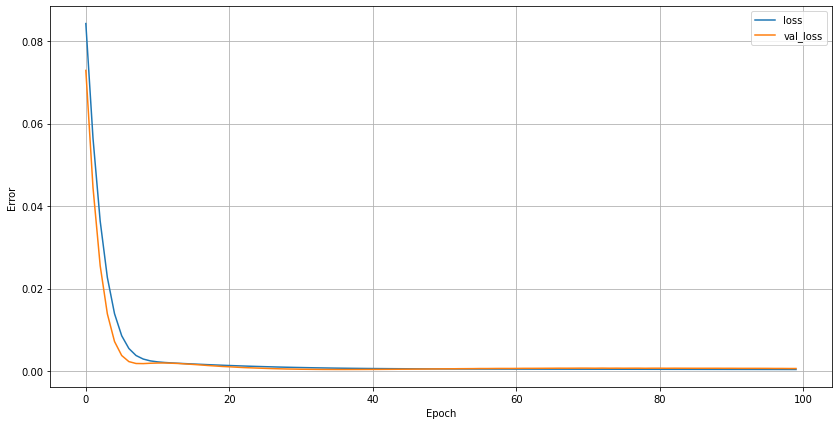

In [ ]:
linear_model = tf.keras.Sequential([
            # normalizer,
            tf.keras.layers.Dense(units=1, input_shape=(4, ))
          ])
linear_model.summary()
linear_model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')
linear_history = linear_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=checkpoint)
plot_loss(linear_history)
test_results['linear_model'] = linear_model.evaluate(X_test, y_test)

##Plot the linear model prediction on test set

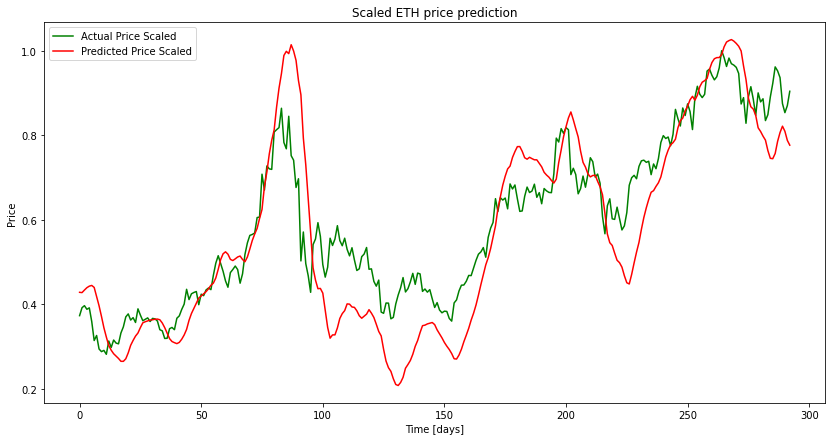

In [ ]:
pred_lin = linear_model.predict(X_test)
plt.plot(y_test, label="Actual Price Scaled", color='green')
plt.plot(pred_lin, label="Predicted Price Scaled", color='red')
 
plt.title('Scaled ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

##Scale values back


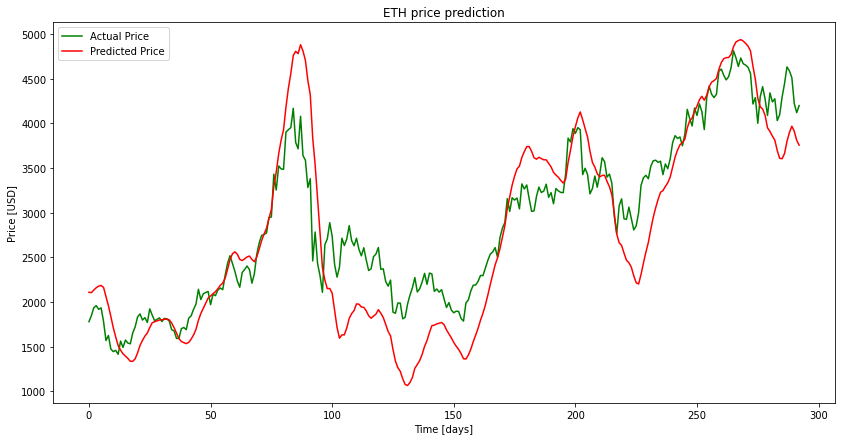

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform(X_test)
lin_pred_inverse = min_max_scaler.inverse_transform(np.c_[pred_lin, np.zeros(pred_lin.shape[0]), np.zeros(pred_lin.shape[0]), np.zeros(pred_lin.shape[0])])

plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(lin_pred_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

##Declare function for future prediction

In [ ]:
import pdb
import copy

In [ ]:
def make_prediction(model, old_pred, period, scaler):
  my_scaler = preprocessing.MinMaxScaler()
  for i in range(period):
    new_pred = copy.deepcopy(old_pred)
    new_pred = pd.DataFrame(np.squeeze([np.delete(scaler.inverse_transform(np.reshape(np.append(x, [0, 0, 0], 0), (1, 4))), [1, 2, 3], 1) for x in new_pred]).reshape(len(new_pred), 1), columns=["Close"])
    new_pred.ta.rsi(close='Close', length=14, append=True)
    new_pred.ta.sma(close='Close', length=14, append=True)
    new_pred.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
    new_pred = new_pred.filter(items=['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']).dropna()

    scaled_pred = my_scaler.fit_transform(new_pred)

    next_prediction = model.predict(np.array(scaled_pred[-1]).reshape(1, 4))
    # pdb.set_trace()
    old_pred = np.append(old_pred, next_prediction, 0)
  return old_pred


##Plot the future prediction of the linear model

In [ ]:
pred_lin = make_prediction(linear_model, pred_lin, 100, min_max_scaler)

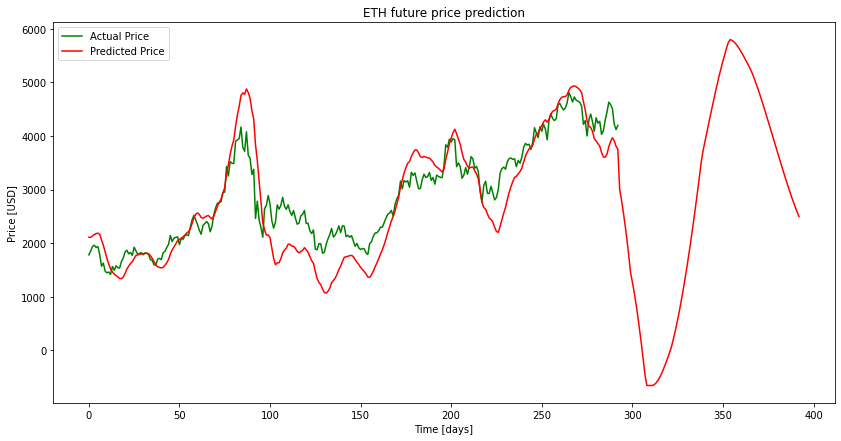

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform(X_test)
lin_pred_inverse = min_max_scaler.inverse_transform(np.c_[pred_lin, np.zeros(pred_lin.shape[0]), np.zeros(pred_lin.shape[0]), np.zeros(pred_lin.shape[0])])

plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(lin_pred_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH future price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

## Today's price prediction

In [ ]:
prediction = linear_model.predict(X[-1].reshape(1, 4))
prediction = [np.squeeze(prediction)]
prediction.extend([0, 0, 0])
prediction = np.array(prediction).reshape(1, 4)
prediction = min_max_scaler.inverse_transform(prediction)
prediction = np.delete(prediction, [1, 2, 3], 1)
print("Today's price prediction: ", prediction[0], " USD")

Today's price prediction:  [3755.72741414]  USD


##Create and fit a fully connected model

In [ ]:
filepath = 'best_fully_connected_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.00019, saving model to best_fully_connected_model.epoch01-loss0.00.hdf5

Epoch 00002: val_loss did not improve from 0.00019

Epoch 00003: val_loss did not improve from 0.00019

Epoch 00004: val_loss did not improve from 0.00019

Epoch 00005: val_loss improved from 0.000

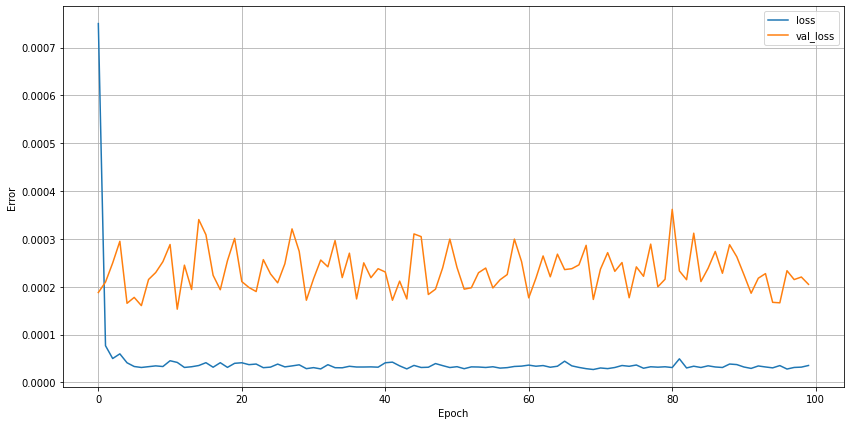

In [ ]:
fully_connected_model = tf.keras.Sequential([
      # normalizer,
      tf.keras.layers.Dense(64, activation='relu', input_shape=(4, )),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
fully_connected_model.summary()
fully_connected_model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')
fully_connected_history = fully_connected_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=checkpoint)
plot_loss(fully_connected_history)
test_results['fully_connected_model'] = fully_connected_model.evaluate(X_test, y_test)

##Plot the fully connected model prediction on test set

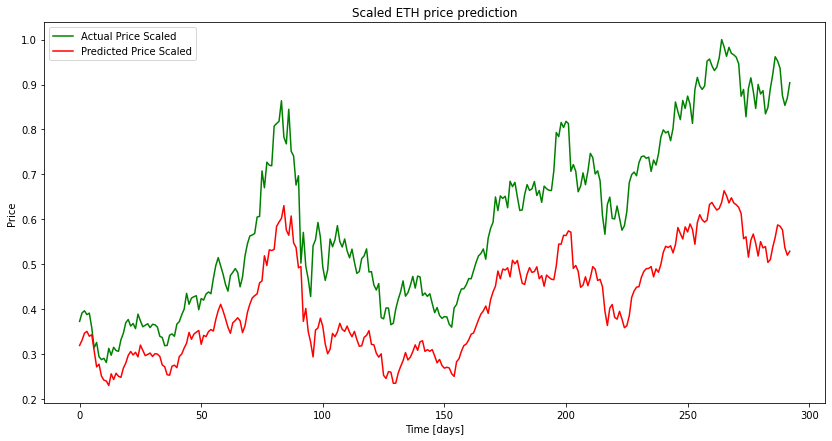

In [ ]:
pred_fully_connected = fully_connected_model.predict(X_test)
plt.plot(y_test, label="Actual Price Scaled", color='green')
plt.plot(pred_fully_connected, label="Predicted Price Scaled", color='red')
 
plt.title('Scaled ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

##Scale values back


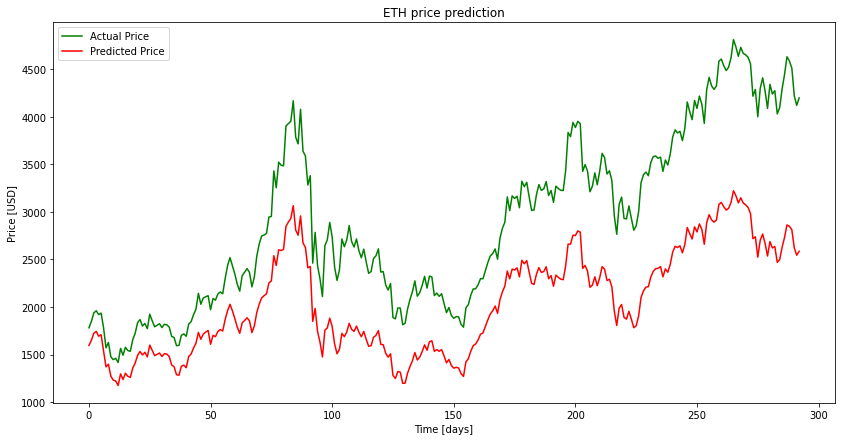

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform(X_test)
lin_pred_fully_connected_inverse = min_max_scaler.inverse_transform(np.c_[pred_fully_connected, np.zeros(pred_fully_connected.shape[0]), np.zeros(pred_fully_connected.shape[0]), np.zeros(pred_fully_connected.shape[0])])

plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(lin_pred_fully_connected_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

##Plot the future prediction of the fully connected model

In [ ]:
pred_fully_connected = make_prediction(fully_connected_model, pred_fully_connected, 100, min_max_scaler)

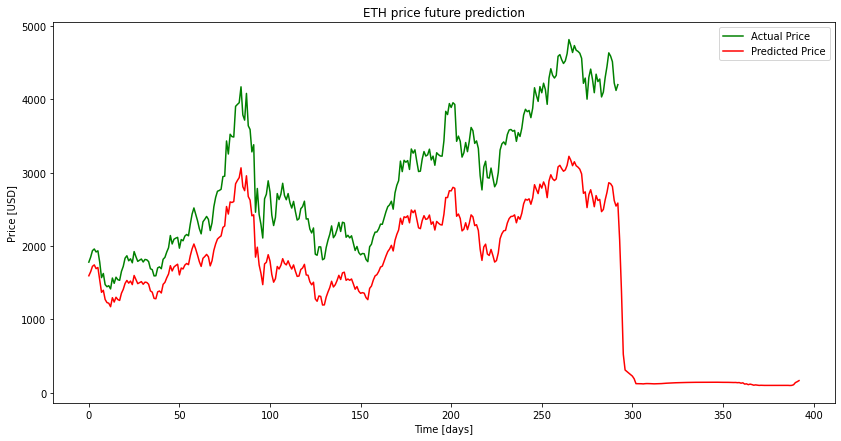

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform(X_test)
lin_pred_fully_connected_inverse = min_max_scaler.inverse_transform(np.c_[pred_fully_connected, np.zeros(pred_fully_connected.shape[0]), np.zeros(pred_fully_connected.shape[0]), np.zeros(pred_fully_connected.shape[0])])

plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(lin_pred_fully_connected_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH price future prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

## Today's price prediction

In [ ]:
prediction = fully_connected_model.predict(X[-1].reshape(1, 4))
prediction = [np.squeeze(prediction)]
prediction.extend([0, 0, 0])
prediction = np.array(prediction).reshape(1, 4)
prediction = min_max_scaler.inverse_transform(prediction)
prediction = np.delete(prediction, [1, 2, 3], 1)
print("Today's price prediction: ", prediction[0], " USD")

Today's price prediction:  [2585.67224173]  USD


## Declare a function that creates sequences from a dataset 

In [ ]:
def create_sequences(data,seq_len):
  s = []
  for i in range(len(data) - seq_len):
    s.append(data[i:(i + seq_len)])
  return np.array(s) # moved to np arrays since it's simpler and we don't need something specifically from panda

##Prepare the data sequences for training


In [ ]:
SEQ_LEN = 100
X_seq = create_sequences(X, SEQ_LEN)
Y_seq = create_sequences(y, SEQ_LEN)
print(X_seq.shape, Y_seq.shape)

(1363, 100, 4) (1363, 100)


In [ ]:
X_seq_train, X_seq_test, Y_seq_train, Y_seq_test = train_test_split(X_seq, Y_seq, test_size=0.2, shuffle=False)
print(X_seq_train.shape, X_seq_test.shape, Y_seq_train.shape, Y_seq_test.shape)

(1090, 100, 4) (273, 100, 4) (1090, 100) (273, 100)


##Create and fit a fully connected model based on sequences


In [ ]:
filepath = 'best_fully_connected_seq_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100, 64)           320       
                                                                 
 dense_5 (Dense)             (None, 100, 32)           2080      
                                                                 
 dense_6 (Dense)             (None, 100, 1)            33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.00359, saving model to best_fully_connected_seq_model.epoch01-loss0.00.hdf5

Epoch 00002: val_loss improved from 0.00359 to 0.00159, saving model to best_fully_connected_seq_model.epoch02-loss0.00.hdf5

Epoch 00003: val_loss improved from 0.00159 to 0.00067, saving mode

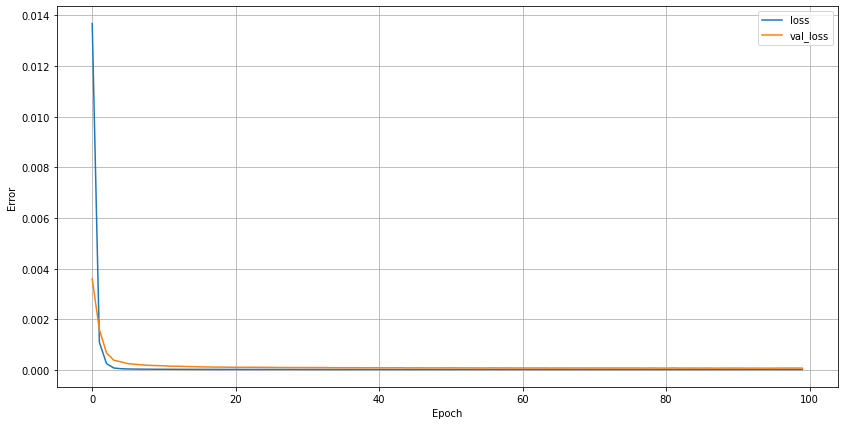

In [ ]:
fully_connected_seq_model = tf.keras.Sequential([
      # normalizer,
      tf.keras.layers.Dense(64, activation='relu', input_shape=(SEQ_LEN, X_seq_train.shape[-1])),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
fully_connected_seq_model.summary()
fully_connected_seq_model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')
fully_connected_seq_history = fully_connected_seq_model.fit(X_seq_train, Y_seq_train, epochs=100, validation_split=0.2, verbose=0, callbacks=checkpoint)
plot_loss(fully_connected_seq_history)
test_results['fully_connected_seq_model'] = fully_connected_seq_model.evaluate(X_seq_test, Y_seq_test)

##Plot the sequence fully connected model on the test set

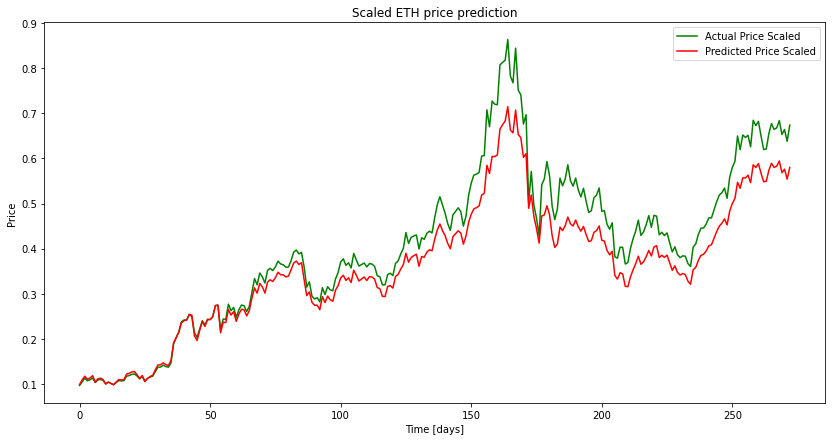

In [ ]:
pred_fully_connected_seq = fully_connected_seq_model.predict(X_seq_test)
y_seq_test = np.array([x[0] for x in X_seq_test])
plt.plot(y_seq_test[:, 0], label="Actual Price Scaled", color='green')
plt.plot(pred_fully_connected_seq[:, 0], label="Predicted Price Scaled", color='red')
 
plt.title('Scaled ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

##Scale values back


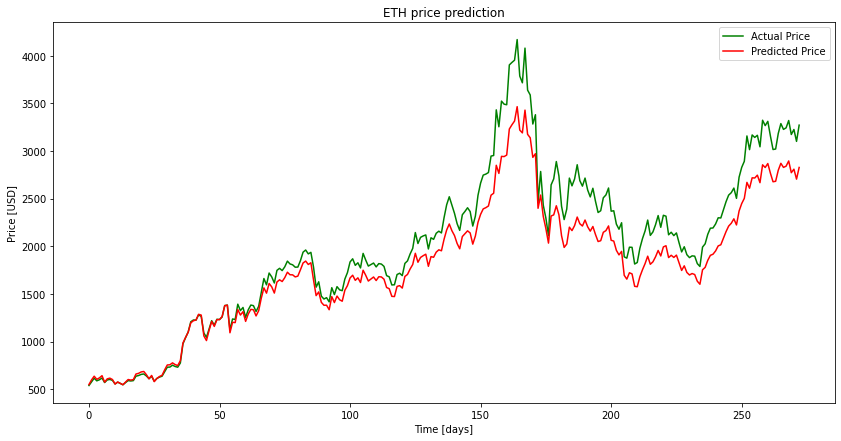

In [ ]:
y_test_seq_inverse = min_max_scaler.inverse_transform([x[0] for x in X_seq_test])
pred_fully_connected_seq_inverse = min_max_scaler.inverse_transform(np.c_[pred_fully_connected_seq[:, 0], np.zeros(pred_fully_connected_seq[:, 0].shape[0]), np.zeros(pred_fully_connected_seq[:, 0].shape[0]), np.zeros(pred_fully_connected_seq[:, 0].shape[0])])

plt.plot(y_test_seq_inverse[:, 0], label="Actual Price", color='green')
plt.plot(pred_fully_connected_seq_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

##Create a function to make future predictions based on sequences

In [ ]:
def make_prediction_seq(model, old_pred, period, scaler):
  my_scaler = preprocessing.MinMaxScaler()
  for i in range(period):
    # pdb.set_trace()
    new_pred = [x[0] for x in copy.deepcopy(old_pred)]
    new_pred = pd.DataFrame(np.squeeze([np.delete(scaler.inverse_transform(np.reshape(np.append(x, [0, 0, 0], 0), (1, 4))), [1, 2, 3], 1) for x in new_pred]).reshape(len(new_pred), 1), columns=["Close"])
    new_pred.ta.rsi(close='Close', length=14, append=True)
    new_pred.ta.sma(close='Close', length=14, append=True)
    new_pred.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
    new_pred = new_pred.filter(items=['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']).dropna()

    scaled_pred = my_scaler.fit_transform(new_pred)
    next_prediction = model.predict(scaled_pred[-1 * SEQ_LEN:].reshape(1, SEQ_LEN, 4))
    old_pred = np.append(old_pred, next_prediction, 0)
  return old_pred

##Plot the future prediction of the sequence fully connected model

In [ ]:
pred_fully_connected_seq = make_prediction_seq(fully_connected_seq_model, pred_fully_connected_seq, 100, min_max_scaler)

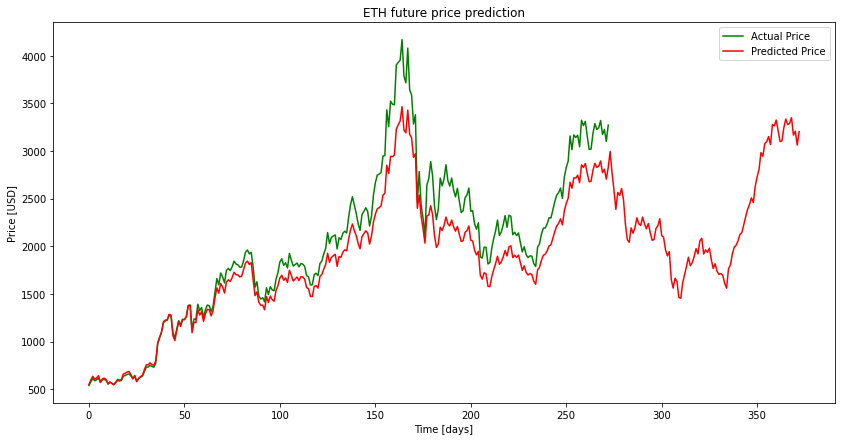

In [ ]:
y_test_seq_inverse = min_max_scaler.inverse_transform([x[0] for x in X_seq_test])
pred_fully_connected_seq_inverse = min_max_scaler.inverse_transform(np.c_[pred_fully_connected_seq[:, 0], np.zeros(pred_fully_connected_seq[:, 0].shape[0]), np.zeros(pred_fully_connected_seq[:, 0].shape[0]), np.zeros(pred_fully_connected_seq[:, 0].shape[0])])

plt.plot(y_test_seq_inverse[:, 0], label="Actual Price", color='green')
plt.plot(pred_fully_connected_seq_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH future price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

## Today's price prediction

In [ ]:
prediction = fully_connected_seq_model.predict(X[-1 * SEQ_LEN:].reshape(1, SEQ_LEN, 4))
prediction = np.squeeze(prediction).T
prediction = np.c_[prediction, np.zeros(prediction.shape[0]), np.zeros(prediction.shape[0]), np.zeros(prediction.shape[0])]
prediction = min_max_scaler.inverse_transform(prediction)
prediction = np.delete(prediction, [1, 2, 3], 1)
print("Today's price prediction: ", prediction[-1], " USD")

Today's price prediction:  [3365.55948274]  USD


##Create and fit a LSTM model based on data frame sequences

In [ ]:
filepath = 'best_lstm_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 100, 200)         84000     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 100, 200)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 400)         641600    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 100, 400)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              400800    
 nal)                                                            
                                                      

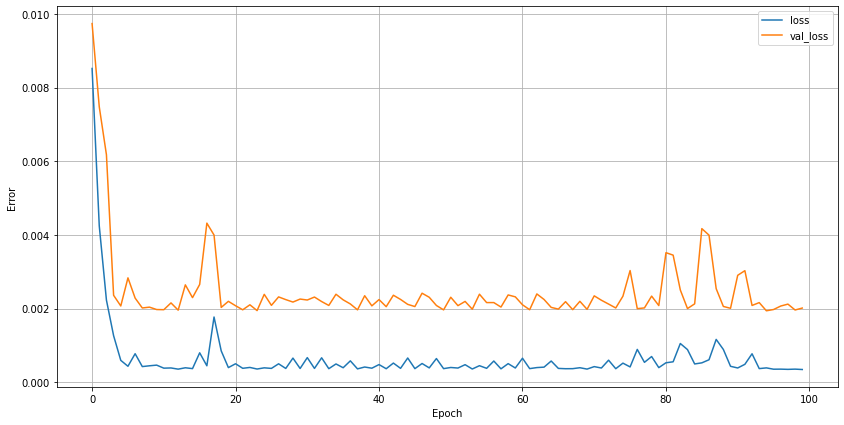

In [ ]:
DROPOUT = 0.2
BATCH_SIZE = 64
callbacks = [checkpoint]
lstm_model = tf.keras.Sequential([
      # seq_normalizer,
      tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(SEQ_LEN, return_sequences=True),
        input_shape=(SEQ_LEN, X_seq_train.shape[-1])
      ),
      tf.keras.layers.Dropout(rate=DROPOUT),
      tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(SEQ_LEN * 2, return_sequences=True)
      ),
      tf.keras.layers.Dropout(rate=DROPOUT),
      tf.keras.layers.Bidirectional(
          tf.keras.layers.LSTM(SEQ_LEN, return_sequences=False),
      ),
      tf.keras.layers.Dense(units=1, activation='linear')

  ])
lstm_model.summary()
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = lstm_model.fit(X_seq_train, Y_seq_train, epochs=100, batch_size=BATCH_SIZE, shuffle=False, validation_split=0.2, callbacks=checkpoint)
plot_loss(lstm_history)
test_results['lstm_model'] = lstm_model.evaluate(X_seq_test, Y_seq_test)

##Print the loss value of the models so we can compare them

In [ ]:
pd.DataFrame(test_results, index=['Mean squared error [Close]']).T

,Mean squared error [Close]
linear_model,0.010779
fully_connected_model,0.040580
fully_connected_seq_model,0.007205
lstm_model,0.021177


## Plot the LSMT model prediction on the test set

In [ ]:
pred = lstm_model.predict(X_seq_test)

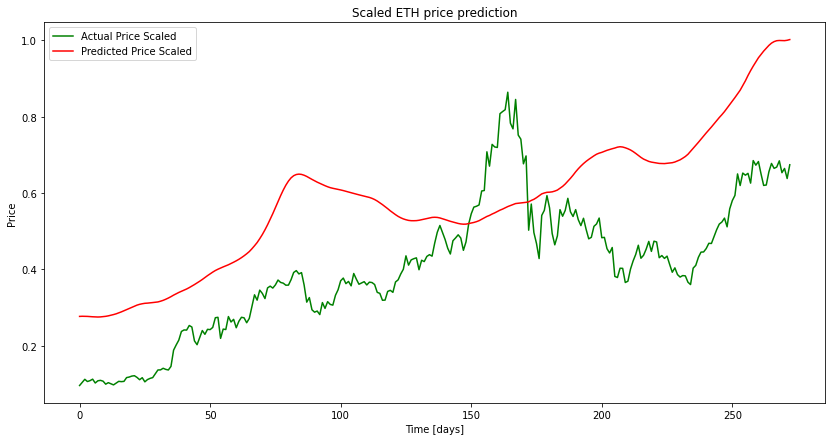

In [ ]:
y_seq_test = np.array([x[0] for x in X_seq_test])
plt.plot(y_seq_test[:, 0], label="Actual Price Scaled", color='green')
plt.plot(pred[:, 0], label="Predicted Price Scaled", color='red')
 
plt.title('Scaled ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

##Scale values back

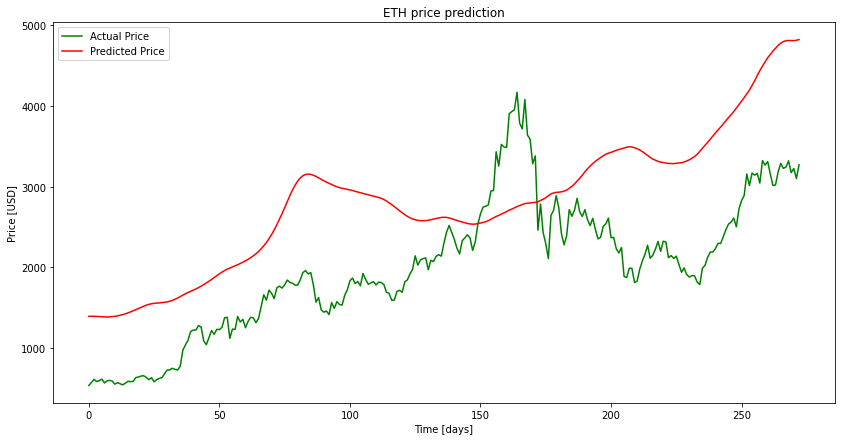

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform([x[0] for x in X_seq_test])
pred_inverse = min_max_scaler.inverse_transform(np.c_[pred, np.zeros(pred.shape[0]), np.zeros(pred.shape[0]), np.zeros(pred.shape[0])])
 
plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(pred_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')
 
plt.show();

##Declare a function to make future predictions using the LSTM model

In [ ]:
def make_prediction_lstm(model, old_pred, period, scaler):
  my_scaler = preprocessing.MinMaxScaler()
  for i in range(period):
    # pdb.set_trace()
    new_pred = copy.deepcopy(old_pred)
    new_pred = pd.DataFrame(np.squeeze([np.delete(scaler.inverse_transform(np.reshape(np.append(x, [0, 0, 0], 0), (1, 4))), [1, 2, 3], 1) for x in new_pred]).reshape(len(new_pred), 1), columns=["Close"])
    new_pred.ta.rsi(close='Close', length=14, append=True)
    new_pred.ta.sma(close='Close', length=14, append=True)
    new_pred.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
    new_pred = new_pred.filter(items=['Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']).dropna()

    scaled_pred = my_scaler.fit_transform(new_pred)
    next_prediction = model.predict(scaled_pred[-1 * SEQ_LEN:].reshape(1, SEQ_LEN, 4))
    old_pred = np.append(old_pred, next_prediction, 0)
  return old_pred

##Plot the future prediction of the LSTM model

In [ ]:
pred = make_prediction_lstm(lstm_model, pred, 100, min_max_scaler)

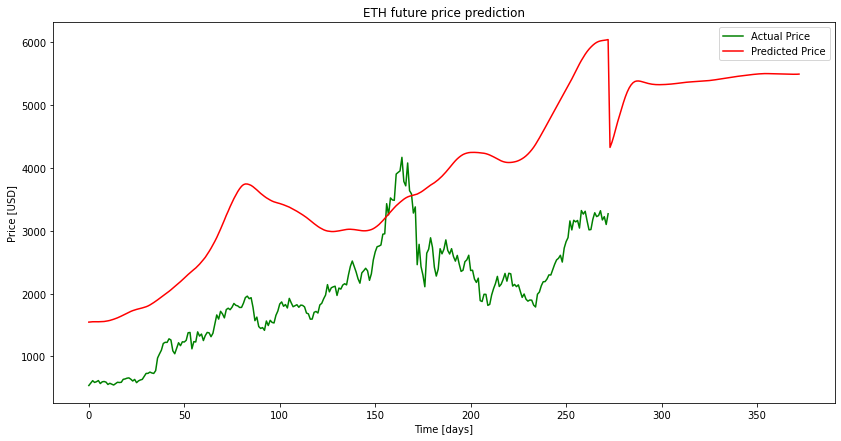

In [ ]:
y_test_inverse = min_max_scaler.inverse_transform([x[0] for x in X_seq_test])
pred_inverse = min_max_scaler.inverse_transform(np.c_[pred, np.zeros(pred.shape[0]), np.zeros(pred.shape[0]), np.zeros(pred.shape[0])])
 
plt.plot(y_test_inverse[:, 0], label="Actual Price", color='green')
plt.plot(pred_inverse[:, 0], label="Predicted Price", color='red')
 
plt.title('ETH future price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')
 
plt.show();

## Today's price prediction

In [ ]:
prediction = lstm_model.predict(X[-1 * SEQ_LEN:].reshape(1, SEQ_LEN, 4))
prediction = [np.squeeze(prediction)]
prediction.extend([0, 0, 0])
prediction = np.array(prediction).reshape(1, 4)
prediction = min_max_scaler.inverse_transform(prediction)
prediction = np.delete(prediction, [1, 2, 3], 1)
print("Today's price prediction: ", prediction[0], " USD")

Today's price prediction:  [6049.96731016]  USD


##Import prophet and rename the data frame columns

In [ ]:
import prophet
from prophet import Prophet

In [ ]:
pf = df.rename(columns={'Date' : 'ds', 'Close' : 'y'})
pf = pf.filter(items=['ds', 'y']).dropna()
pf.head()

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003


##Fit the prophet

In [ ]:
PREDICTION_PERIOD = 365
p = Prophet()
train = pf.drop(pf.index[-1 * PREDICTION_PERIOD:])
p.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Prepare future dates and make predictions


In [ ]:
future = p.make_future_dataframe(periods=PREDICTION_PERIOD)
future.tail()

,ds
1484,2021-12-02
1485,2021-12-03
1486,2021-12-04
1487,2021-12-05
1488,2021-12-06


In [ ]:
forecast = p.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
y_pred = forecast['yhat'].values

##Plot the predictions

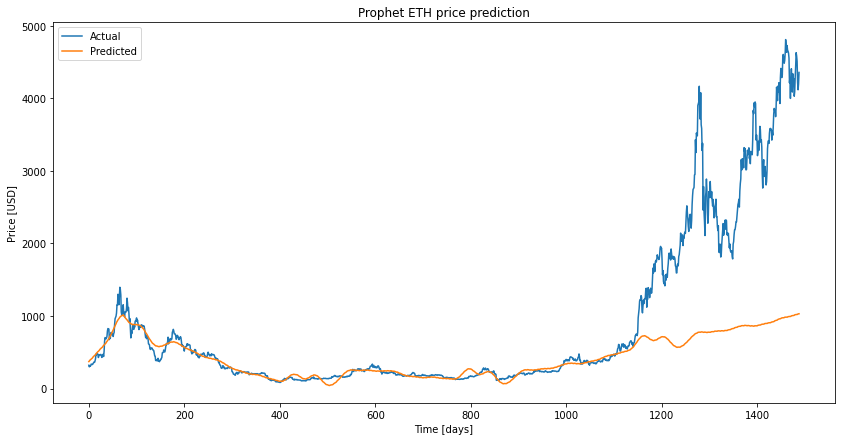

In [ ]:
plt.plot(pf['y'], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.title("Prophet ETH price prediction")
plt.legend()
plt.show()

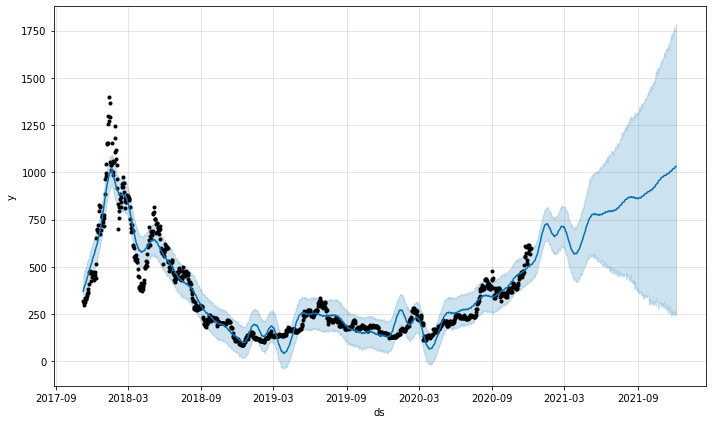

In [ ]:
fig1 = p.plot(forecast)

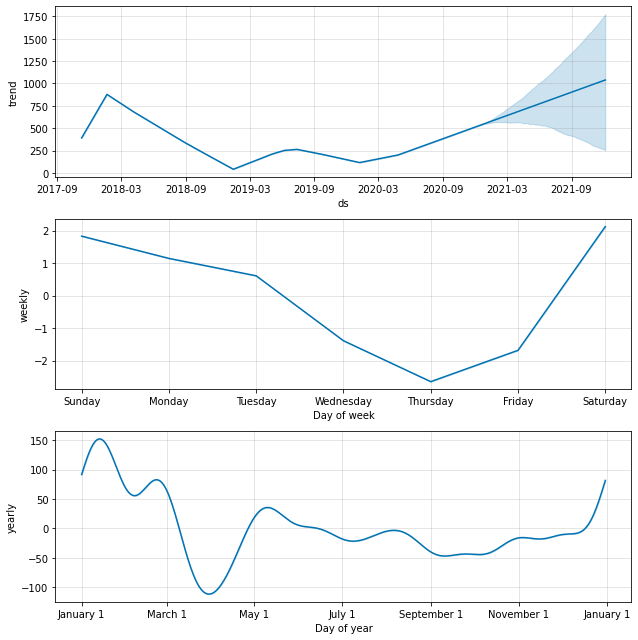

In [ ]:
fig2 = p.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(p, forecast)

In [ ]:
plot_components_plotly(p, forecast)

## Today's price prediction

In [ ]:
print("Today's price prediction: ", y_pred[0], " USD")

Today's price prediction:  371.4063629998125  USD


##Import ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.special import inv_boxcox

from scipy import stats
import statsmodels.api as sm
import itertools
import warnings

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



##Prepare training data

In [ ]:
df = pd.read_csv(csv_data, parse_dates=['Date'])
df = df.drop(columns=['Volume', 'Adj Close'])
df.ta.rsi(close='Close', length=14, append=True)
df.ta.sma(close='Close', length=14, append=True)
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df = df.filter(items=['Open', 'High', 'Low', 'Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']).dropna()
np.isnan(pdf).any()

Close           False
RSI_14          False
SMA_14          False
MACD_12_26_9    False
dtype: bool

In [ ]:
df.tail()

,Open,High,Low,Close,RSI_14,SMA_14,MACD_12_26_9
1484,4586.333008,4628.919922,4441.507813,4511.302246,54.699428,4322.790562,41.816017
1485,4514.355957,4647.289063,4100.145508,4220.706055,46.799576,4317.247663,24.781433
1486,4227.762207,4242.725586,3525.494141,4119.587402,44.396798,4296.508824,3.086394
1487,4119.628906,4246.923340,4040.217529,4198.322754,46.691830,4291.408098,-7.665433
1488,4199.000000,4375.520508,3930.806641,4358.737305,51.118641,4310.713780,-3.205272


In [ ]:
X = df[['Open', 'High', 'Low', 'Close', 'RSI_14', 'SMA_14', 'MACD_12_26_9']][:(-1 * OFFSET)]
y = df['Close'][OFFSET:]

##Fit ARIMA parameters

In [ ]:
# Initial approximation of parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings('ignore')
# Model Selection
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=y,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16788.280756664557
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16788.280756664557
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:16788.28075

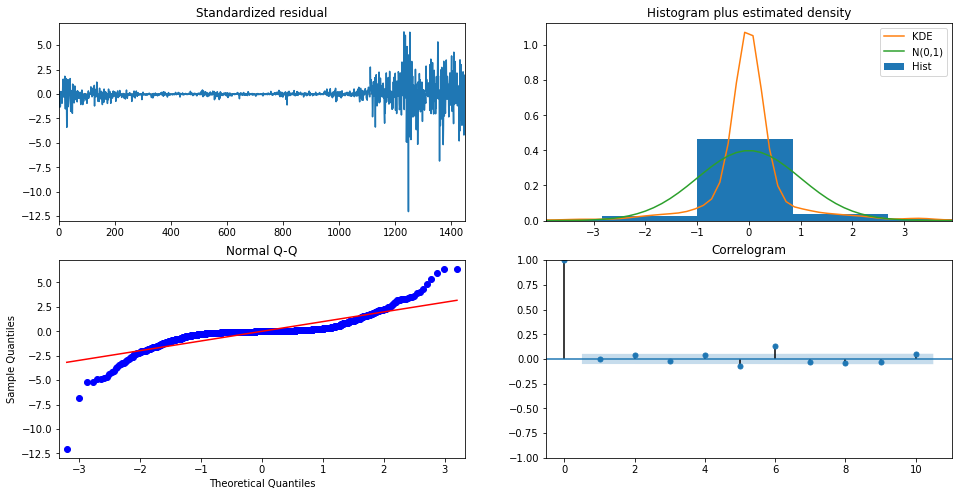

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1463
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -8300.651
Date:                            Wed, 12 Jan 2022   AIC                          16611.302
Time:                                    20:32:58   BIC                          16637.695
Sample:                                         0   HQIC                         16621.151
                                           - 1463                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0027      0.000   2210.024      0.000       1.002       1.004
ma.L1         -0.1017      0.012   

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(results.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


In [ ]:
prediction = results.predict()

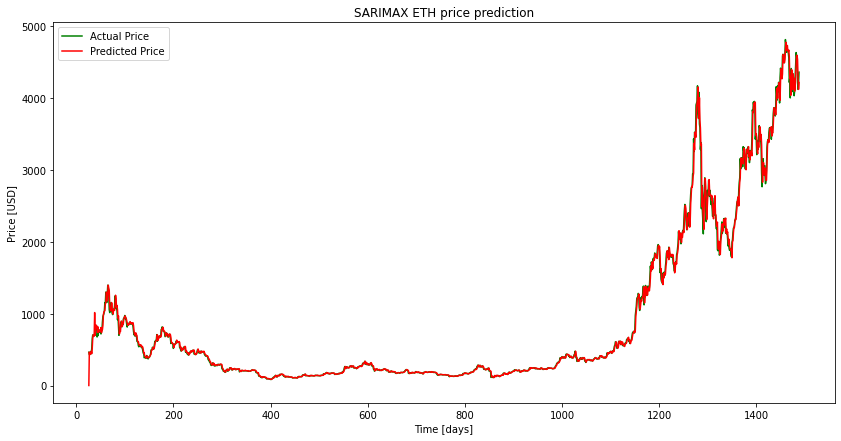

In [ ]:
plt.plot(y, label="Actual Price", color='green')
plt.plot(prediction, label="Predicted Price", color='red')

plt.title('SARIMAX ETH price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price [USD]')
plt.legend(loc='best')

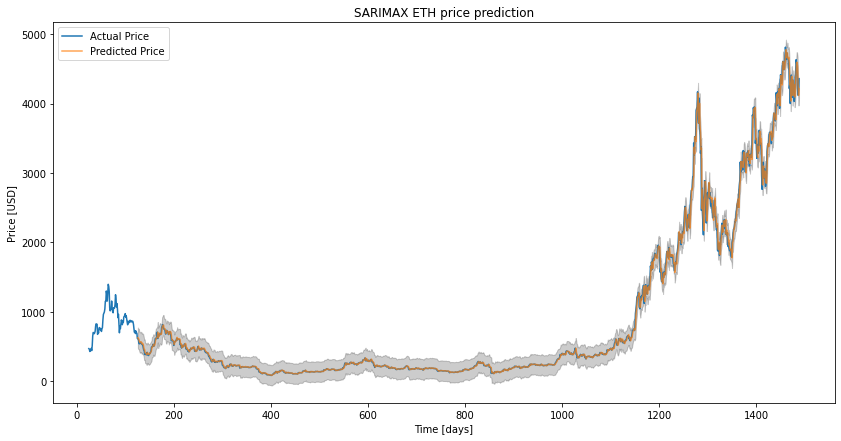

In [ ]:
pred = results.get_prediction(start=100, dynamic=False)
pred_ci = pred.conf_int()

ax = df["Close"].plot(label='Actual Price')
pred.predicted_mean.plot(ax=ax, label='Predicted Price', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title('SARIMAX ETH price prediction')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Price [USD]')
plt.legend(loc='best')

plt.show()

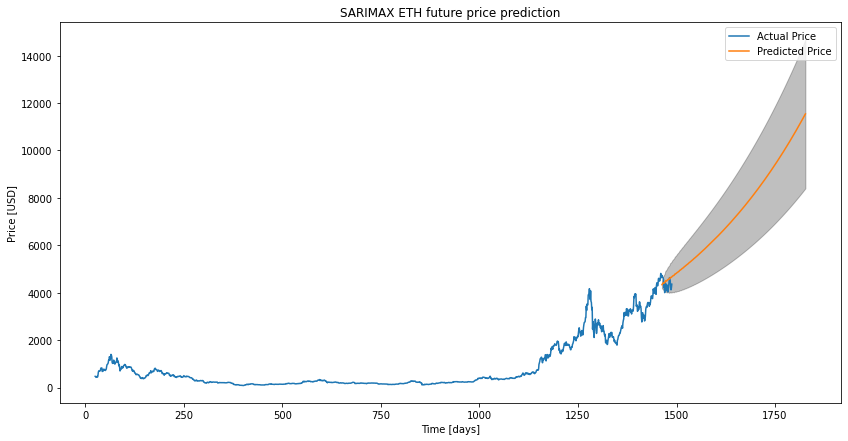

In [ ]:
years = 1
pred_uc = results.get_forecast(steps=365*years)
pred_ci = pred_uc.conf_int()
ax = df["Close"].plot(label='Actual Price')
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Price')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title('SARIMAX ETH future price prediction')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Price [USD]')
plt.legend(loc='best')
plt.show()
plt.close()

## Today's prediction

In [ ]:
print("Today's price prediction: \n", pred_uc.conf_int().iloc[0])

Today's price prediction: 
 lower Close    4189.288081
upper Close    4482.035681
Name: 1463, dtype: float64
